In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [4]:
df = pd.read_csv("/content/synthetic_fraud_dataset.csv")
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [5]:
df.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

,0
transaction_id,0
user_id,0
amount,0
transaction_type,0
merchant_category,0
country,0
hour,0
device_risk_score,0
ip_risk_score,0
is_fraud,0


In [8]:
df.dtypes

,0
transaction_id,int64
user_id,int64
amount,float64
transaction_type,object
merchant_category,object
country,object
hour,int64
device_risk_score,float64
ip_risk_score,float64
is_fraud,int64


In [9]:
df = df.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col.fillna(col.mode()[0]))

In [10]:
df.isnull().sum()

,0
transaction_id,0
user_id,0
amount,0
transaction_type,0
merchant_category,0
country,0
hour,0
device_risk_score,0
ip_risk_score,0
is_fraud,0


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


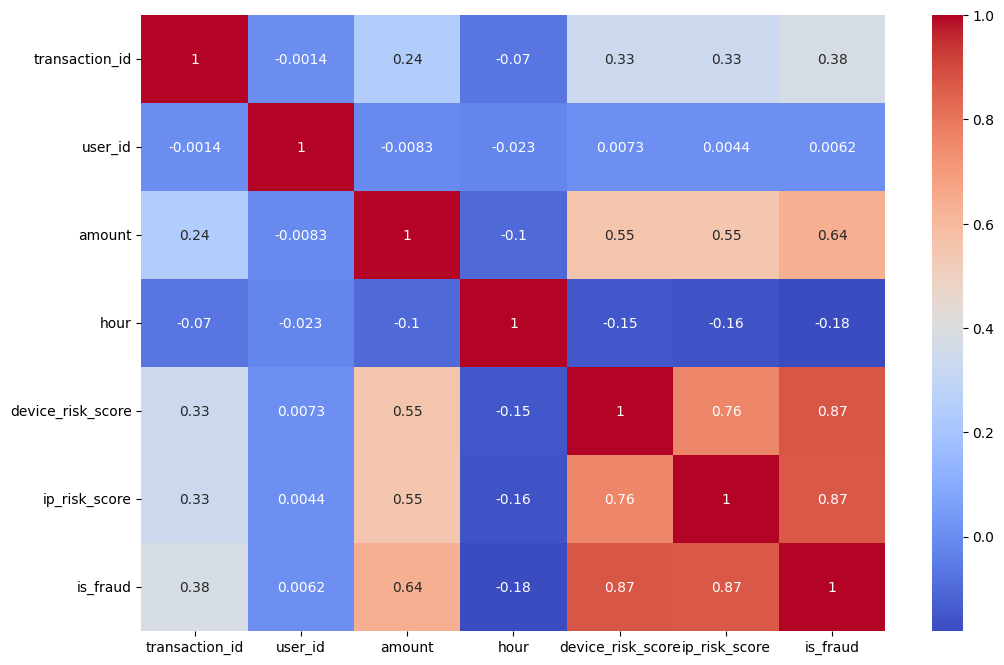

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [14]:
X = pd.get_dummies(df.drop('is_fraud',axis=1) , drop_first=True)
y = df['is_fraud']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create an MLP model for classification with the following Hidden Layer architecture:
o Hidden Layer 1: 128 neurons, ReLU activation function.
o Hidden Layer 2: 64 neurons, Tanh activation function.
o Hidden Layer 3: 32 neurons, ReLU activation function.
o Decide input and output by yourself
• Compile the model with the appropriate loss function and the Adam optimizer.
• Train the model on the training data for 50 epochs.
• Evaluate the model on the testing data.
• Additionally, monitor key metrics like accuracy, precision, recall, or F1 score during
training and testing phases.

In [20]:
input_size = X_train_scaled.shape[1]
model = Sequential()

model.add(Dense(128,input_shape=(input_size,),activation='relu'))
model.add(Dense(64,activation='tanh'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

model.fit(X_train_scaled,y_train,epochs=50,batch_size=32,validation_data=(X_test_scaled,y_test))




Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9654 - loss: 0.1415 - val_accuracy: 1.0000 - val_loss: 6.3178e-04
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.3004e-04 - val_accuracy: 1.0000 - val_loss: 1.7682e-04
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2520e-04 - val_accuracy: 1.0000 - val_loss: 8.0970e-05
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.0344e-05 - val_accuracy: 1.0000 - val_loss: 4.6338e-05
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.6459e-05 - val_accuracy: 1.0000 - val_loss: 2.9551e-05
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.1873e-05 - val_accuracy: 1.0000 - val_loss: 2.0294e-05
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.6408e-05 - val_accuracy: 1.0000 - val_loss: 1.4637e-05
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

In [29]:
import numpy as np
y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)
y_pred_binary = np.round(y_pred)

acc = accuracy_score(y_test,y_pred_binary)
print("acc: ",acc)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
acc:  1.0


In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

p = np.round(prec)
r = np.round(rec)
f = np.round(f1)
print("Precision:", p)
print("Recall:", r)
print("F1 Score:", f)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [31]:
# task 5

wine = pd.read_csv("/content/WineQT.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [32]:
wine.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [33]:
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [35]:
X = wine.drop('quality',axis=1)
y = wine['quality']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
print(y_train[:10])
print(type(y_train))
print(y_train.dtype)
print(np.unique(y_train))


12      7
758     6
636     5
1109    5
743     5
620     6
673     7
994     5
796     6
184     5
Name: quality, dtype: int64
<class 'pandas.core.series.Series'>
int64
[3 4 5 6 7 8]


In [48]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

print(np.unique(y_train))


[0 1 2 3 4 5]


In [49]:
num_classes = len(np.unique(y_train))
input_size = X_train_scaled.shape[1]
model = Sequential()

model.add(Dense(20,input_shape=(input_size,),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train_scaled,y_train,epochs=10,batch_size=32,validation_data=(X_test_scaled,y_test))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2767 - loss: 1.8706 - val_accuracy: 0.3668 - val_loss: 1.6393
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3689 - loss: 1.5865 - val_accuracy: 0.4192 - val_loss: 1.4359
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4426 - loss: 1.3863 - val_accuracy: 0.4498 - val_loss: 1.2961
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4875 - loss: 1.2763 - val_accuracy: 0.5284 - val_loss: 1.1929
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4982 - loss: 1.2019 - val_accuracy: 0.5721 - val_loss: 1.1203
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5461 - loss: 1.1584 - val_accuracy: 0.5764 - val_loss: 1.0726
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5739 - loss: 1.0825 - val_accuracy: 0.5808 - val_loss: 1.0357
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6003 - loss: 1.0523 - val_accuracy: 0.5808 - val_loss: 1.0144
Ep

In [54]:
y_pred = model.predict(X_test_scaled)
y_arg = np.argmax(y_pred,axis=1)
print (f"acc: {accuracy_score(y_test,y_arg)}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
acc: 0.6026200873362445
